In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import scipy.stats as sps
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

ALPHA = 0.05

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Calculated F Value: 0.294004458787
Calcuated p-value: 0.746010677722
Would not be considered significant at alpha of 0.05
fifty values:

          0         1         2         3         4
0  0.294004  1.087195  0.198263  1.811478  1.687312
1  2.043620  0.593073  1.400124  0.374604  0.824570
2  0.678803  0.096109  2.442021  0.503096  1.519952
3  0.798646  0.105131  0.142147  1.646641  0.413259
4  0.399117  0.165860  2.276505  0.894110  0.546294
5  0.167429  0.242393  0.723026  4.709239  0.646102
6  1.083447  1.198690  0.423633  0.488571  1.212702
7  0.970559  0.333700  0.594718  0.068306  0.760654
8  2.171304  0.610407  0.421155  0.413000  1.442897
9  0.065046  0.923476  0.966725  1.461025  0.479746
------------------------------------------------------
Sampling distribution of 15000 F values from monte carlo simulation:
------------------------------------------------------

0.05 of the distribution should be downslope from the critical value


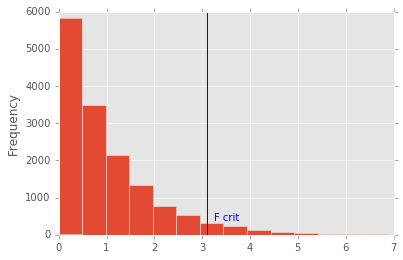

In [2]:
# Rather than 50 trials, I set it to 15k..
NUM_TRIALS = 15000

## This builds the f test simulation.
f_values = []
p_values = []
for i in xrange(0, NUM_TRIALS + 1):
    
    # create a dataframe of 30 random normal variates with mean of 20, std dev of 2 for each group
    df = pd.DataFrame({
            'group_1': sps.norm.rvs(loc=20, scale=2, size=30, random_state=None),
            'group_2': sps.norm.rvs(loc=20, scale=2, size=30, random_state=None),
            'group_3': sps.norm.rvs(loc=20, scale=2, size=30, random_state=None),
        })
    # performs one way f test.
    f, p = sps.f_oneway(df['group_1'].values, df['group_2'].values, df['group_3'].values)
    
    # saving the F and P values into the lists.
    f_values.append(f)
    p_values.append(p)

# results of all the simulations.
result_df = pd.DataFrame({'f_values': f_values, 'p_values': p_values})

# Determining degress of freedom
df_num = len(df.columns) - 1
# In python, one can add up boolean values. True = 1. So, this is the total number of non-null values.
df_den = df.notnull().sum().sum() - df_num

# calcuating the f crit value using scipy.stats
f_crit = sps.f.isf(0.05, df_num, df_den)

first_f_value = result_df.iloc[0]['f_values']
first_f_p_val = result_df.iloc[0]['p_values']

print "Calculated F Value: {}".format(first_f_value)
print "Calcuated p-value: {}".format(first_f_p_val)
if first_f_p_val <= 0.05:
    print "Would be considered significant at alpha of 0.05"
else:
    print "Would not be considered significant at alpha of 0.05"
    
print "fifty values:\n"
print pd.DataFrame(result_df.head(50)['f_values'].values.reshape(10, 5))
print '------------------------------------------------------'
print 'Sampling distribution of {} F values from monte carlo simulation:'.format(NUM_TRIALS)
result_df['f_values'].plot.hist(bins=25)
plt.xlim(0, 7)
plt.axvline(f_crit)
plt.text(f_crit * 1.05, 400, "F crit", {'color': 'b'})

print '------------------------------------------------------'
print
print '0.05 of the distribution should be downslope from the critical value'

------------------------------------------------------
Sampling distribution of 15000 F values from monte carlo simulation (NULL FALSE!):


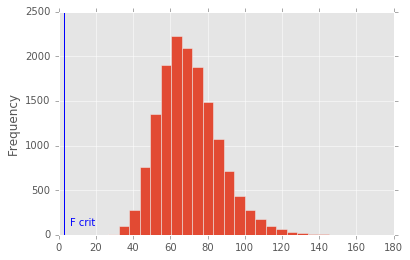

In [3]:
print '------------------------------------------------------'
print 'Sampling distribution of {} F values from monte carlo simulation (NULL FALSE!):'.format(NUM_TRIALS)

f_values = []
p_values = []
for i in xrange(0, NUM_TRIALS + 1):
    df = pd.DataFrame({
            'group_1': sps.norm.rvs(loc=20, scale=2, size=30, random_state=None),
            'group_2': sps.norm.rvs(loc=23, scale=2, size=30, random_state=None),
            'group_3': sps.norm.rvs(loc=26, scale=2, size=30, random_state=None),
        })
    # performs one way f test.
    f, p = sps.f_oneway(df['group_1'].values, df['group_2'].values, df['group_3'].values)
    f_values.append(f)
    p_values.append(p)

# results of all the simulations.
result_df = pd.DataFrame({'f_values': f_values, 'p_values': p_values})
result_df['f_values'].plot.hist(bins=25)
plt.axvline(f_crit)
plt.text(f_crit * 2, 100, "F crit", {'color': 'b'})